In [1]:
# pyspark --packages org.mongodb.spark:mongo-spark-connector_2.11:2.2.0
import numpy as np
import bigfloat as bg
from numpy.linalg import norm
from sklearn import linear_model
from sklearn.cluster import KMeans as sklearn_KMeans
from pyspark.sql import SparkSession
import h5py
import pandas as pd
import numpy as np
import copy
import os
import sys
import matplotlib
from __future__ import print_function
import sys
import numpy as np
from pyspark import SparkContext
from pyspark.mllib.clustering import KMeans as pyspark_KMeans
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from pyspark.mllib.linalg import Vector as MLLibVector, Vectors as MLLibVectors
from pyspark.mllib.regression import  LabeledPoint
from pyspark.sql.functions import col
import math
import pyspark.sql.functions as pyfunctions
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
# connect to mongodb
my_spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config("spark.mongodb.input.uri", "mongodb://127.0.0.1/okcoindb.historical_data") \
    .config("spark.mongodb.output.uri", "mongodb://127.0.0.1/okcoindb.historical_data") \
    .getOrCreate()
df = my_spark.read.format("com.mongodb.spark.sql.DefaultSource").load()


In [3]:

df = df.select('date', 'price', 'v_ask', 'v_bid')
df.show()

+-------------------+-------+------------------+------------------+
|               date|  price|             v_ask|             v_bid|
+-------------------+-------+------------------+------------------+
|2018-10-07 20:22:23|6555.92| 49.39590000000001|57.832999999999984|
|2018-10-07 20:22:33|6555.92|49.740100000000005| 57.64739999999998|
|2018-10-07 20:22:43|6552.61|49.740100000000005| 57.64739999999998|
|2018-10-07 20:22:53|6552.61|49.740100000000005| 57.64739999999998|
|2018-10-07 20:23:03|6552.61| 49.47540000000001|57.832999999999984|
|2018-10-07 20:23:13|6552.46| 49.47540000000001|57.832999999999984|
|2018-10-07 20:23:23|6552.46| 49.70600000000001|57.832999999999984|
|2018-10-07 20:23:33|6552.46| 49.70600000000001|57.832999999999984|
|2018-10-07 20:23:43|6552.46| 49.70600000000001|58.795099999999984|
|2018-10-07 20:23:53|6554.38| 49.70600000000001|58.795099999999984|
|2018-10-07 20:24:03|6554.38| 49.83810000000001|58.795099999999984|
|2018-10-07 20:24:13|6554.38| 49.83810000000001|

In [4]:

print(df.printSchema())
filename = '/Users/zhaocai/PycharmProjects/5003project/bitcoin181110.csv'
df_azure = spark.read.csv(filename, header=True, inferSchema=True)
df_azure.show()
df_azure.count()
df = df.unionAll(df_azure)
df.count()

root
 |-- date: timestamp (nullable = true)
 |-- price: double (nullable = true)
 |-- v_ask: double (nullable = true)
 |-- v_bid: double (nullable = true)

None
+-------------------+-------+------------------+-----------------+
|               date|  price|             v_ask|            v_bid|
+-------------------+-------+------------------+-----------------+
|2018-10-24 15:57:37|6414.87|131.07739999999998|          82.9433|
|2018-10-24 15:58:07|6414.79|127.13759999999999|          81.1229|
|2018-10-24 15:58:17|6414.79|126.60749999999999|84.08560000000001|
|2018-10-24 15:58:27|6415.19|127.80949999999999|84.08560000000001|
|2018-10-24 15:58:37|6415.19|127.80949999999999|84.08560000000001|
|2018-10-24 15:58:42|6415.19|127.01939999999999|84.08560000000001|
|2018-10-24 15:58:47|6415.19|127.01939999999999|84.08560000000001|
|2018-10-24 15:58:52|6415.19|127.01939999999999|84.08560000000001|
|2018-10-24 15:58:57|6415.19|127.55479999999999|84.08560000000001|
|2018-10-24 15:59:02|6415.19|127.55

109287

In [5]:
df.toPandas().to_csv('bitcoin.csv',index=None)

In [ ]:
prices = []
v_ask = []
v_bid = []
num_points = 777600
df_py=pd.DataFrame()
df_py=df.toPandas()
df_new = df_py[-40000:]
df_new.head()

In [110]:
df_new.info()
df_new.to_csv('integrate.csv',index=None)
df_check = df_new[-13333:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 69287 to 109286
Data columns (total 4 columns):
date     40000 non-null datetime64[ns]
price    40000 non-null float64
v_ask    40000 non-null float64
v_bid    40000 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.2 MB


In [111]:
df_check.to_csv('check.csv', index=None)

In [8]:
prices = df_new['price']
v_ask = df_new['v_ask']
v_bid = df_new['v_bid']
[prices1, prices2, prices3] = np.array_split(prices, 3)
prices1 = list(prices1)
prices2 = list(prices2)
#np.savetxt(prices3,'prices3.txt')
np.savetxt('prices3.txt', prices3, delimiter=',') 
prices3 = list(prices3)
[v_bid1, v_bid2, v_bid3] = np.array_split(v_bid, 3)
v_bid1 = list(v_bid1)
v_bid2 = list(v_bid2)
#np.savetxt(prices3,'v_bid3.txt')
np.savetxt('v_bid3.txt', v_bid3, delimiter=',') 
v_bid3 = list(v_bid3)
[v_ask1, v_ask2, v_ask3] = np.array_split(v_ask, 3)
v_ask1 = list(v_ask1)
v_ask2 = list(v_ask2)
#np.savetxt(prices3,'v_ask3.txt')
np.savetxt('v_ask3.txt', v_ask3, delimiter=',') 
v_ask3 = list(v_ask3)

In [116]:
def generate_timeseries(prices, n):
    """Use the first time period to generate all possible time series of length n
       and their corresponding label.

    Args:
        prices: A numpy array of floats representing prices over the first time
            period.
        n: An integer (180, 360, or 720) representing the length of time series.

    Returns:
        A 2-dimensional numpy array of size (len(prices)-n) x (n+1). Each row
        represents a time series of length n and its corresponding label
        (n+1-th column).
    """
    m = len(prices) - n
    ts = np.empty((m, n + 1))
    for i in range(m):
        ts[i, :n] = prices[i:i + n]
        ts[i, n] = prices[i + n] - prices[i + n - 1]
    return ts


def find_cluster_centers(timeseries, k, flag='pyspark'):
    """Cluster timeseries in k clusters using k-means and return k cluster centers.

    Args:
        timeseries: A 2-dimensional numpy array generated by generate_timeseries().
        k: An integer representing the number of centers (100).
        flag: indicate which KMeans to use if flag='pyspark' use pyspark_KMeans
    Returns:
        A 2-dimensional numpy array of size k x num_columns(timeseries). Each
        row represents a cluster center.
    """
    if(flag != 'pyspark'):
        #from sklearn.cluster import KMeans
        k_means = sklearn_KMeans(n_clusters=k)
        k_means.fit(timeseries)
        # print('k_means.cluster_centers_', k_means.cluster_centers_)
        return k_means.cluster_centers_
    else:
        # from pyspark.mllib.clustering import KMeans
        # print(flag)
        rdd = sc.parallelize(timeseries)
        model = pyspark_KMeans.train(rdd, k)
        return model.clusterCenters
    

def choose_effective_centers(centers, n):
    """Choose n most effective cluster centers with high price variation.
       for sklearn_KMeans return type is list
       for pyspark_KMeans return type is array
    """
    if type(centers) == type([]):
        centers = np.array(centers)
    return centers[np.argsort(np.ptp(centers, axis=1))[-n:]]

def choose_effective_centers_by_SampEn(centers, n):
    '''
    choose_effective centers by Sample entropy
    '''
    def SampEn(U):
        m=2
        r=0.2 *np.std(U)
        def _maxdist(x_i, x_j):
            return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

        def _phi(m):
            x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
            B = [(len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) - 1.0) / (N - m) for x_i in x]
            return (N - m + 1.0)**(-1) * sum(B)

        N = len(U)
        return -np.log(_phi(m+1) / _phi(m))
    
    
    rdd_s = sc.parallelize(centers)
    tmp_s = rdd_s.map(lambda p: (SampEn(p), p)).sortByKey(ascending= False)
    centers = tmp_s.map(lambda p: p[1]).collect()
    return np.array(centers[0:n])

def predict_dpi(x, s, flag='pyspark'):
    """Predict the average price change Δp_i, 1 <= i <= 3.

    Args:
        x: A numpy array of floats representing previous 180, 360, or 720 prices.
        s: A 2-dimensional numpy array generated by choose_effective_centers().
        flag: indicate which method to calculate average price change Δp_i if flag='pyspark', 
              use mapreduce method
    Returns:
        A big float representing average price change Δp_i.
    """
    num = 0
    den = 0
    if(flag != 'pyspark'):
        #print('flag',flag)
        for i in range(len(s)):
            y_i = s[i, len(x)]
            x_i = s[i, :len(x)]
            exp = bg.exp(-0.25 * norm(x - x_i) ** 2)
            num += y_i * exp
            den += exp
        return num / den
    else:
        len_x = len(x)
        rdd_s = sc.parallelize(s)
        tmp_s = rdd_s.map(lambda p: (p[len_x],p[:len_x]))
        # maybe a bug pyspark do not support bigfloat.exp
        den_rdd = tmp_s.map(lambda p: (math.exp(-0.25 * norm(x - p[1])**2),p[0]))
        num = den_rdd.map(lambda p: (p[0] * p[1])).reduce(lambda x,y: x+y)  
        den = den_rdd.map(lambda p: p[0]).reduce(lambda x,y: x+y) 
        # print(num / den)
        return num / den
    

def linear_regression_vars(prices, v_bid, v_ask, s1, s2, s3, flag='pyspark'):
    """Use the second time period to generate the independent and dependent variables
       in the linear regression model Δp = w0 + w1 * Δp1 + w2 * Δp2 + w3 * Δp3 + w4 * r.

    Args:
        prices: A numpy array of floats representing prices over the second time
            period.
        v_bid: A numpy array of floats representing total volumes people are
            willing to buy over the second time period.
        v_ask: A numpy array of floats representing total volumes people are
            willing to sell over the second time period.
        s1: A 2-dimensional numpy array generated by choose_effective_centers()
        s2: A 2-dimensional numpy array generated by choose_effective_centers().
        s3: A 2-dimensional numpy array generated by choose_effective_centers().

    Returns:
        A tuple (X, Y) representing the independent and dependent variables in
        the linear regression model. X is a 2-dimensional numpy array and each
        row represents [Δp1, Δp2, Δp3, r]. Y is a numpy array of floats and
        each array element represents Δp.
    """
    X = np.empty((len(prices) - 721, 4))
    Y = np.empty(len(prices) - 721)
    for i in range(720, len(prices) - 1):
        dp = prices[i + 1] - prices[i]
        dp1 = predict_dpi(prices[i - 180:i], s1, flag)
        dp2 = predict_dpi(prices[i - 360:i], s2, flag)
        dp3 = predict_dpi(prices[i - 720:i], s3, flag)
        r = (v_bid[i] - v_ask[i]) / (v_bid[i] + v_ask[i])
        X[i - 720, :] = [dp1, dp2, dp3, r]
        Y[i - 720] = dp
    return X, Y

def find_parameters_w_spark(Dpi_r, Dp):
    train_pd = pd.DataFrame(Dpi_r)
    train_pd['label'] = Dp
    df_spark = spark.createDataFrame(train_pd)
    #df_spark.show()
    # Define the `input_data` 
    parsedData = df_spark.rdd.map(lambda x: LabeledPoint(x[-1], (x[0:-1])))
    lgs = LinearRegressionWithSGD.train(parsedData, iterations=100000, step=0.001)
    w0 = lgs.intercept
    w1, w2, w3, w4 = lgs.weights
    return w0, w1, w2, w3, w4

def find_parameters_w(X, Y,flag='pyspark'):
    """Find the parameter values w for the model which best fits X and Y.

    Args:
        X: A 2-dimensional numpy array representing the independent variables
            in the linear regression model.
        Y: A numpy array of floats representing the dependent variables in the
            linear regression model.

    Returns:
        A tuple (w0, w1, w2, w3, w4) representing the parameter values w.
    """
    if(flag != 'pyspark'):
        clf = linear_model.LinearRegression()
        #clf = linear_model.SGDRegressor(max_iter=10000, alpha=0.1)
        clf.fit(X, Y)
        w0 = clf.intercept_
        w1, w2, w3, w4 = clf.coef_
        #print('spark_none',w0, w1, w2, w3, w4)
        print('nospark')
        return w0, w1, w2, w3, w4
    else:
        print('pyspark')
        return find_parameters_w_spark(X,Y)


def predict_dps(prices, v_bid, v_ask, s1, s2, s3, w, flag='pyspark'):
    """Predict average price changes (final estimations Δp) over the third
       time period.

    Args:
        prices: A numpy array of floats representing prices over the third time
            period.
        v_bid: A numpy array of floats representing total volumes people are
            willing to buy over the third time period.
        v_ask: A numpy array of floats representing total volumes people are
            willing to sell over the third time period.
        s1: A 2-dimensional numpy array generated by choose_effective_centers()
        s2: A 2-dimensional numpy array generated by choose_effective_centers().
        s3: A 2-dimensional numpy array generated by choose_effective_centers().
        w: A tuple (w0, w1, w2, w3, w4) generated by find_parameters_w().

    Returns:
        A numpy array of floats. Each array element represents the final
        estimation Δp.
    """
    dps = []
    w0, w1, w2, w3, w4 = w
    for i in range(720, len(prices) - 1):
        dp1 = predict_dpi(prices[i - 180:i], s1, flag)
        dp2 = predict_dpi(prices[i - 360:i], s2, flag)
        dp3 = predict_dpi(prices[i - 720:i], s3, flag)
        r = (v_bid[i] - v_ask[i]) / (v_bid[i] + v_ask[i])
        dp = w0 + w1 * dp1 + w2 * dp2 + w3 * dp3 + w4 * r
        dps.append(float(dp))
    return dps


def evaluate_performance(prices, dps, t, step):
    """Use the third time period to evaluate the performance of the algorithm.

    Args:
        prices: A numpy array of floats representing prices over the third time
            period.
        dps: A numpy array of floats generated by predict_dps().
        t: A number representing a threshold.
        step: An integer representing time steps (when we make trading decisions).

    Returns:
        A number representing the bank balance.
    """
    bank_balance = 0
    position = 0
    real_dp =[]
    trades_num = 0
    for i in range(720, len(prices) - 1, step):
        # long position - BUY
         #real_dp.append(prices[i] - prices[i-1])
        if dps[i - 720] > t and position <= 0:
            position += 1
            bank_balance -= prices[i]
            trades_num += 1
        # short position - SELL
        if dps[i - 720] < -t and position >= 0:
            position -= 1
            bank_balance += prices[i]
            trades_num += 1
    # sell what you bought
    if position > 0:
        bank_balance += prices[len(prices) - 1]*position
        trades_num += 1
    # pay back what you borrowed
    if position < 0:
        bank_balance += prices[len(prices) - 1]*position
        trades_num += 1
    return bank_balance, trades_num

In [10]:
timeseries180 = generate_timeseries(prices1, 180)
timeseries360 = generate_timeseries(prices1, 360)
timeseries720 = generate_timeseries(prices1, 720)
centers180 = find_cluster_centers(timeseries180, 100)
s1 = choose_effective_centers_by_SampEn(centers180, 20)
centers360 = find_cluster_centers(timeseries360, 100)
s2 = choose_effective_centers_by_SampEn(centers360, 20)
centers720 = find_cluster_centers(timeseries720, 100)
s3 = choose_effective_centers_by_SampEn(centers720, 20)



In [11]:
df_centers720 = pd.DataFrame(centers720)
df_centers720.to_csv('centers720.csv', index=None)
df_s3=pd.DataFrame(s3)
df_s3.info()
df_s3.to_csv('s3.csv', index=None)
df_s2=pd.DataFrame(s2)
df_s2.info()
df_s2.to_csv('s2.csv', index=None)
df_s1=pd.DataFrame(s1)
df_s1.info()
df_s1.to_csv('s1.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 721 entries, 0 to 720
dtypes: float64(721)
memory usage: 112.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 361 entries, 0 to 360
dtypes: float64(361)
memory usage: 56.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 181 entries, 0 to 180
dtypes: float64(181)
memory usage: 28.4 KB


In [12]:
Dpi_r, Dp = linear_regression_vars(prices2, v_bid2, v_ask2, s1, s2, s3,'nospark')
w = find_parameters_w(Dpi_r, Dp, 'pyspark')
print('w:', w)

pyspark
w: (0.0, 8.116235234688582e-07, 7.984229407696678e-07, -1.302544194313926e-06, -4.032949162348384e-06)


In [13]:
np.savetxt('w.txt', w, delimiter=',') 
w1 = np.genfromtxt('w.txt') 

In [14]:
w1

array([ 0.00000000e+00,  8.11623523e-07,  7.98422941e-07, -1.30254419e-06,
       -4.03294916e-06])

In [126]:
bank_balance = evaluate_performance(prices3, dps, t=3.9343919008996864e-06, step=1)
print('bank_balance:', bank_balance)

bank_balance: (0, 0)


In [61]:
max(dps)

1.1343919008996864e-06
-2.808651081855704e-06


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
profit =np.array([1,2])
threshold=np.array([3,2])
ax.scatter(threshold, profit)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('threshold')
ax.set_ylabel('profit')
plt.show()

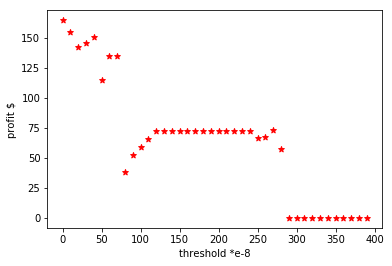

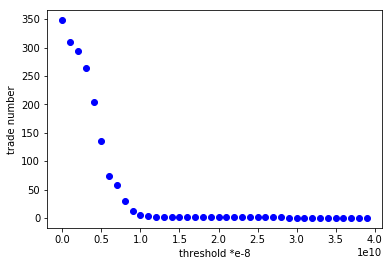

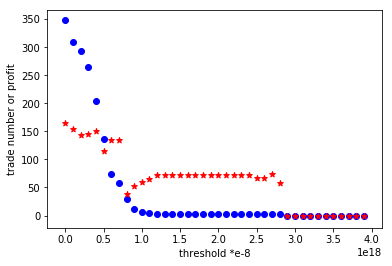

In [167]:
import numpy as np
threshold = np.arange(0,4.0e-06 , 0.0000001)
profit_l = []
trade_num_1 = []
for i in threshold:
   bank_balance, trade_num = evaluate_performance(prices3, dps, i, step=1)
   profit_l.append(bank_balance)
   trade_num_1.append(trade_num)
    
profit = np.array(profit_l)
trade_num = np.array(trade_num_1)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#profit =np.array(profit_l)
#threshold=np.array([3,2])
threshold = np.array([ 100000000 * i for i in threshold ])
ax.scatter(threshold, profit, c='red', marker='*')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('threshold *e-8')
ax.set_ylabel('profit $')
plt.show(block=True)

fig, ax = plt.subplots()
#profit =np.array(profit_l)
#threshold=np.array([3,2])
threshold = np.array([ 100000000 * i for i in threshold ])
ax.scatter(threshold, trade_num,c='blue')
#ax.scatter(threshold, profit,c='red')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('threshold *e-8')
ax.set_ylabel('trade number')
plt.show(block=True)


fig, ax = plt.subplots()
#profit =np.array(profit_l)
#threshold=np.array([3,2])
threshold = np.array([ 100000000 * i for i in threshold ])
ax.scatter(threshold, trade_num,c='blue', marker='o')
ax.scatter(threshold, profit,c='red', marker='*')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('threshold *e-8')
ax.set_ylabel('trade number or profit')
plt.show(block=True)


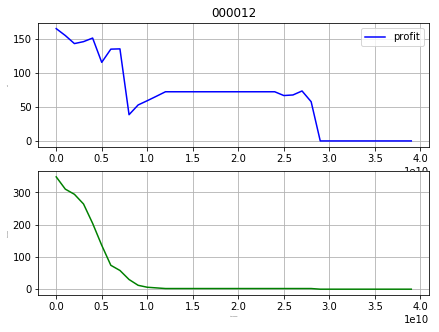

In [149]:
#fig, ax = plt.subplots()
plt.figure(figsize=(7,5))       # 确定图片大小

plt.subplot(211)                # 确定第一个图的位置
plt.plot(threshold,profit,'b',label="profit")
plt.grid(True)
plt.axis('tight')
plt.ylabel('profit',size=1)
plt.title("000012")

plt.legend(loc=0)

plt.subplot(212)               # 确定第2个图的位置
plt.plot(threshold, trade_num,'g',label="trade number")  # 直方图的画法
plt.grid(True)
plt.xlabel("threshold *e-8",size=1)
plt.ylabel("trade number",size=1)
#plt.legend(loc=0)
#plt.gcf().autofmt_xdate()
plt.show()

In [72]:
real_dps =[]
for i in range(720, len(prices3) - 1, 1):
        # long position - BUY
    real_dps.append(prices3[i] - prices3[i-1])
print(max(dps))
print(min(dps))
print(np.median(dps))
print(np.mean(dps))

1.1343919008996864e-06
-2.808651081855704e-06
-7.571327511904974e-07
-6.9534450106696e-07


In [141]:
trade_num

array([348, 310, 294, 264, 204, 136,  74,  58,  30,  12,   6,   4,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0])

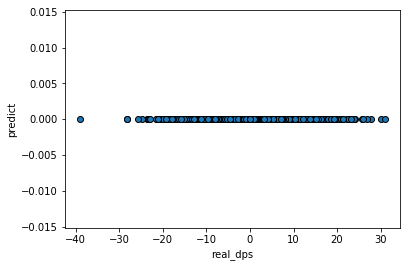

In [119]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
profit =dps
threshold=np.array(real_dps)
ax.scatter(threshold, profit,edgecolors=(0, 0, 0))
#ax.scatter(y, predicted, )
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('real_dps')
ax.set_ylabel('predict')
plt.show()

In [ ]:
real_dps

In [124]:
trade_num

array([348, 310, 294, 264, 204, 136,  74,  58,  30,  12,   6,   4,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0])

In [127]:
profit

array([-2.43707234e-06, -2.16235143e-06, -2.16235143e-06, ...,
       -3.20167807e-07, -3.22622712e-07, -3.24391483e-07])

In [168]:
max(profit)

164.75

In [132]:
df_profit=pd.DataFrame(profit)
df_profit.rename(columns={ df_profit.columns[0]: "profit" }, inplace=True)
df_profit

,profit
0,164.75
1,154.61
2,142.79
3,145.63
4,150.90
5,115.26
6,134.64
7,135.04
8,38.49
9,52.79


In [133]:
df_trade_num=pd.DataFrame(trade_num)
df_trade_num.rename(columns={ df_trade_num.columns[0]: "trade_num" }, inplace=True)
df_trade_num['profit'] = df_profit["profit"]

In [134]:
df_trade_num

,trade_num,profit
0,348,164.75
1,310,154.61
2,294,142.79
3,264,145.63
4,204,150.90
5,136,115.26
6,74,134.64
7,58,135.04
8,30,38.49
9,12,52.79


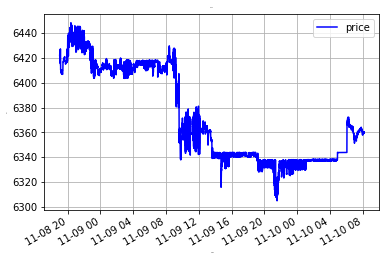

In [169]:
plt.plot(df_check['date'],df_check['price'].values,lw=1.5,label="price",color='blue')
#plt.plot(data_time_translation,data['high'].values,label="high",color='red',lw=1.5)
#plt.plot(data_time_translation,data['close'].values,lw=1.5,label="close",color='green')
#plt.plot(data_time_translation,data['low'].values,lw=1.5,label="low",color='yellow')
# 自动旋转日期标记
plt.gcf().autofmt_xdate()

# 绘图细节
plt.grid(True)
plt.axis("tight")
plt.xlabel('Time',size=1)
plt.ylabel('Price',size=1)
plt.title('000012',size=1)
# 添加图例
plt.legend(loc=0)

plt.show()

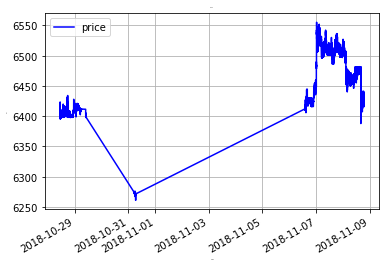

In [173]:
data_test = df_new[-40000:-13333]
plt.plot(data_test['date'],data_test['price'].values,lw=1.5,label="price",color='blue')
#plt.plot(data_time_translation,data['high'].values,label="high",color='red',lw=1.5)
#plt.plot(data_time_translation,data['close'].values,lw=1.5,label="close",color='green')
#plt.plot(data_time_translation,data['low'].values,lw=1.5,label="low",color='yellow')
# 自动旋转日期标记
plt.gcf().autofmt_xdate()

# 绘图细节
plt.grid(True)
plt.axis("tight")
plt.xlabel('Time',size=1)
plt.ylabel('Price',size=1)
plt.title('000012',size=1)
# 添加图例
plt.legend(loc=0)

plt.show()

In [162]:
def evaluate_performance_conside_fees(prices, dps, t, step):
    """Use the third time period to evaluate the performance of the algorithm.

    Args:
        prices: A numpy array of floats representing prices over the third time
            period.
        dps: A numpy array of floats generated by predict_dps().
        t: A number representing a threshold.
        step: An integer representing time steps (when we make trading decisions).

    Returns:
        A number representing the bank balance.
    """
    fees = 0.0005
    bank_balance = 0
    position = 0
    real_dp =[]
    trades_num = 0
    for i in range(720, len(prices) - 1, step):
        # long position - BUY
         #real_dp.append(prices[i] - prices[i-1])
        if dps[i - 720] > t and position <= 0:
            position += 1
            bank_balance -= prices[i]
            bank_balance -= prices[i]*fees
            trades_num += 1
        # short position - SELL
        if dps[i - 720] < -t and position >= 0:
            position -= 1
            bank_balance += prices[i]
            bank_balance -= prices[i]*fees
            trades_num += 1
    # sell what you bought
    if position > 0:
        bank_balance += prices[len(prices) - 1]*position
        trades_num += 1
        bank_balance -= prices[i]*fees*position
    # pay back what you borrowed
    if position < 0:
        bank_balance += prices[len(prices) - 1]*position
        bank_balance += prices[i]*fees*position
        trades_num += 1
    return bank_balance, trades_num

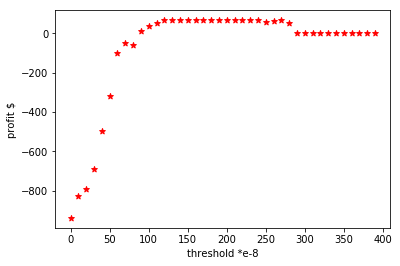

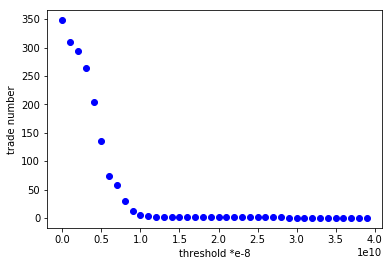

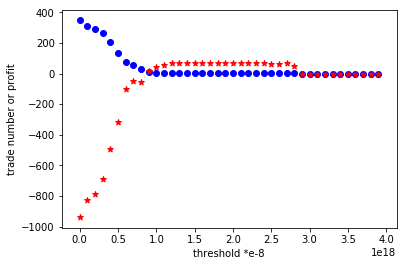

In [163]:
import numpy as np
threshold = np.arange(0,4.0e-06 , 0.0000001)
profit_l = []
trade_num_1 = []
for i in threshold:
   bank_balance, trade_num = evaluate_performance_conside_fees(prices3, dps, i, step=1)
   profit_l.append(bank_balance)
   trade_num_1.append(trade_num)
    
profit = np.array(profit_l)
trade_num = np.array(trade_num_1)


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#profit =np.array(profit_l)
#threshold=np.array([3,2])
threshold = np.array([ 100000000 * i for i in threshold ])
ax.scatter(threshold, profit, c='red', marker='*')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('threshold *e-8')
ax.set_ylabel('profit $')
plt.show(block=True)

fig, ax = plt.subplots()
#profit =np.array(profit_l)
#threshold=np.array([3,2])
threshold = np.array([ 100000000 * i for i in threshold ])
ax.scatter(threshold, trade_num,c='blue')
#ax.scatter(threshold, profit,c='red')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('threshold *e-8')
ax.set_ylabel('trade number')
plt.show(block=True)


fig, ax = plt.subplots()
#profit =np.array(profit_l)
#threshold=np.array([3,2])
threshold = np.array([ 100000000 * i for i in threshold ])
ax.scatter(threshold, trade_num,c='blue', marker='o')
ax.scatter(threshold, profit,c='red', marker='*')
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('threshold *e-8')
ax.set_ylabel('trade number or profit')
plt.show(block=True)


In [165]:
max(profit)

66.8932150000004